Hey

In [1]:
import pandas as pd
import lightgbm as ltb
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')


%matplotlib inline
%config InlineBackend.figure_format = 'svg'


# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5



In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_seq_items', 1000)

In [ ]:
# data_traff = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/train/hash_school_dpi_model_traff.sas7bdat')
# data = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/train/hash_school_dpi_model_fe.sas7bdat')


In [ ]:
# data_traff.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/hash_school_dpi_model_traff.parquet.gzip',compression='gzip')
# data.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/hash_school_dpi_model_fe.parquet.gzip',compression='gzip')

In [ ]:
# data_traff_test = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_traff_test.sas7bdat')
# data_test = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_fe_test.sas7bdat')
# data_test2 = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_test.sas7bdat')

In [ ]:
# data_traff = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/train/hash_school_dpi_model_traff.sas7bdat')
# data = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/train/hash_school_dpi_model_fe.sas7bdat')


In [ ]:
# data_traff.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/hash_school_dpi_model_traff.parquet.gzip',compression='gzip')
# data.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/hash_school_dpi_model_fe.parquet.gzip',compression='gzip')

In [ ]:
# print(data.shape)
# print(data_traff.shape)
# data_traff = data_traff.drop_duplicates()
# data = data.drop_duplicates()
# print(data.shape)
# print(data_traff.shape)

In [ ]:
# data_traff_unique = data_traff.abon_id.value_counts()
# duplicates_data_traff = data_traff_unique[data_traff_unique > 1].index.to_list()
# data_traff.loc[data_traff['abon_id'].isin(duplicates_data_traff)].sort_values(by = 'abon_id')

In [ ]:
# data = data.merge(data_traff, on = 'abon_id')
# del data_traff

In [ ]:
# columns_nulls_less_60p = data.columns[(data.isnull().sum()/data['abon_id'].size) < 0.6]
# print(columns_nulls_less_60p.shape)
# data_nulls_less_60p = data[columns_nulls_less_60p]
# data_nulls_less_60p.shape
# del data

In [ ]:
# def mark_outliers(df, cols, outlier_coeff = 1.5): 
#     outliers_mask = df.copy()
#     counter = 1
#     for col in cols:
        
#         p75, p25 = df[col].quantile(0.75), df[col].quantile(0.25)
#         IQR_col = p75 - p25
#         upper, lower = p75 + outlier_coeff*IQR_col, p25 - outlier_coeff*IQR_col
#         outliers_mask[col] = df[col].apply(lambda x: True if(x > upper or x < lower) else False)
#         if (counter%100 == 0):
#             print(counter)
#         counter += 1
#     return outliers_mask        
        
# # test = pd.DataFrame(data = np.array([1,2,5,100,2,5,1000]), columns = ['test'])
# # mark_outliers(test, test)

In [ ]:
# data_nulls_less_60p_outliers_mask = mark_outliers(data_nulls_less_60p, data_nulls_less_60p.columns)

In [ ]:
# data_nulls_less_60p_outliers_mask.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_nulls_less_60p_outliers_mask.parquet.gzip',compression='gzip')
# data_nulls_less_60p.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_nulls_less_60p.parquet.gzip',compression='gzip')

In [ ]:
# data_nulls_less_60p_outliers_mask.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_nulls_less_60p_outliers_mask.parquet.gzip',compression='gzip')
# data_nulls_less_60p.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_nulls_less_60p.parquet.gzip',compression='gzip')

In [ ]:
# data_traff = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/hash_school_dpi_model_traff.parquet.gzip')
# data = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/hash_school_dpi_model_fe.parquet.gzip')
# data_nulls_less_60p_outliers_mask = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_nulls_less_60p_outliers_mask.parquet.gzip')
# data_nulls_less_60p = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_nulls_less_60p.parquet.gzip')

In [19]:
data_traff = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/hash_school_dpi_model_traff.parquet.gzip')
data = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/hash_school_dpi_model_fe.parquet.gzip')
data_nulls_less_60p_outliers_mask = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_nulls_less_60p_outliers_mask.parquet.gzip')
data_nulls_less_60p = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_nulls_less_60p.parquet.gzip')
data_few_nans_not_univalue_target_corr = pd.read_csv('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_few_nans_not_univalue_target_corr.csv', \
                                                    index_col='index')

# START HERE

In [74]:
def univalue_feauture_info (df, cols, outliers_mask_df):
    
    univalue_feauture_info_df = pd.DataFrame(columns=['col', '%of_fr_univalue', '%of_unfr_univalue','freq_value', 'if_cat', '%outliers', '%nans'])
    
    df_length = df.shape[0]
    
    for col in cols:
        
        value_count_info = df[col].value_counts().sort_values(ascending = False)
        
        if (np.array_equal(value_count_info.index, [1,0]) or np.array_equal(value_count_info.index,[0,1])):
            if_cat = 1 
        else: 
            if_cat = 0
            
        freq_value = value_count_info.index[0]
        freq_value_count = value_count_info.iloc[0]/df_length
        #print(freq_value_count)
        try:
            unfreq_value_count = value_count_info.iloc[1]/df_length
        except:
            unfreq_value_count = np.nan
        #print(unfreq_value_count)
        perc_outl = outliers_mask_df[col].sum()/df_length
        perc_nans = df[col].isnull().sum()/df_length
        
        #print(freq_count)
        univalue_feauture_info_df = univalue_feauture_info_df.append({'col': col, \
                                                                      '%of_fr_univalue': freq_value_count,\
                                                                      '%of_unfr_univalue': unfreq_value_count,\
                                                                      'if_cat': if_cat,\
                                                                      '%outliers': perc_outl,\
                                                                      '%nans': perc_nans,\
                                                                      'freq_value': freq_value},\
                                                                      ignore_index=True)
        
    return univalue_feauture_info_df.sort_values(by = ['%of_fr_univalue', '%outliers','%nans'], ascending=False)   

# data_nulls_less_60p_temp_mask = mark_outliers(data_nulls_less_60p, ['Balance_uah', 'CALCULATION_METHOD_ID', 'device_brand_other'])
# temp = univalue_feauture_info(data_nulls_less_60p, ['Balance_uah', 'CALCULATION_METHOD_ID', 'device_brand_other'],data_nulls_less_60p_temp_mask)
# temp

In [75]:
univalue_cols = univalue_feauture_info(data_nulls_less_60p, data_nulls_less_60p.columns, data_nulls_less_60p_outliers_mask)

In [76]:
def highlight_p75(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s >= s.quantile(0.75)
    return ['background-color: yellow' if v else '' for v in is_max]

In [77]:
cat_cols = univalue_cols[univalue_cols['if_cat'] == 1]
num_cols = univalue_cols[univalue_cols['if_cat'] == 0]

In [ ]:


univalue_cat_cols_style = cat_cols.style.apply(highlight_p75, subset=['%outliers', '%nans']).format({'%of_fr_univalue': "{:.2%}",'%of_unfr_univalue': "{:.2%}",'%outliers': "{:.2%}",'%nans': "{:.2%}"})
univalue_cat_cols_style

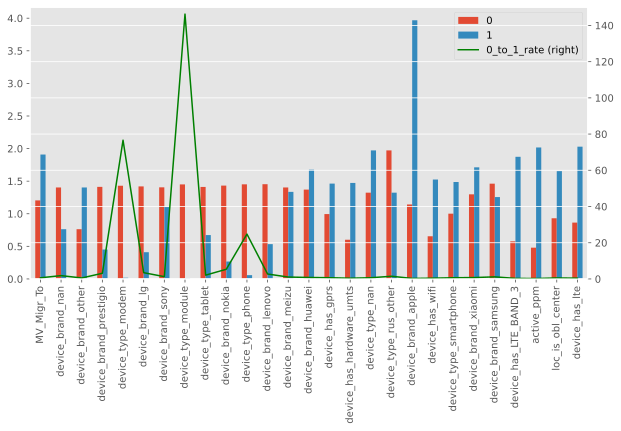

In [78]:
cat_cols_list = cat_cols['col'].tolist()

target_by_cat_cols = pd.DataFrame(index=cat_cols_list, columns=['0', '1', '0_to_1_rate'])

for col in cat_cols_list:
    temp = data_nulls_less_60p.pivot_table(columns=col,values='target', aggfunc='median').fillna(0).applymap(float)
#     print(temp.values[0][0])
    target_by_cat_cols.loc[col]['0'] = temp.values[0][0]
    target_by_cat_cols.loc[col]['1'] = temp.values[0][1]
    target_by_cat_cols.loc[col]['0_to_1_rate'] = temp.values[0][0]/temp.values[0][1]

width = .35
    
ax1 = target_by_cat_cols.loc[:, ['0', '1']].plot(kind = 'bar', figsize = (10,5), rot = 90);
ax2 = target_by_cat_cols['0_to_1_rate'].plot(secondary_y=True, colormap = 'ocean', rot = 90, legend = True);
ax2.set_ylim(0, 150);


In [79]:
target_by_cat_cols.sort_values(by = '0_to_1_rate',ascending = False)

,0,1,0_to_1_rate
device_type_module,1.450159,0.009916,146.239787
device_type_modem,1.430222,0.01867,76.603667
device_type_phone,1.451873,0.058642,24.758107
device_brand_nokia,1.431742,0.267215,5.358015
device_brand_lg,1.41947,0.410003,3.462093
device_brand_prestigio,1.412137,0.451645,3.126652
device_brand_lenovo,1.453132,0.533938,2.721538
device_type_tablet,1.411989,0.673647,2.096036
device_brand_nan,1.40387,0.762984,1.839973
device_type_rus_other,1.972186,1.323181,1.490489


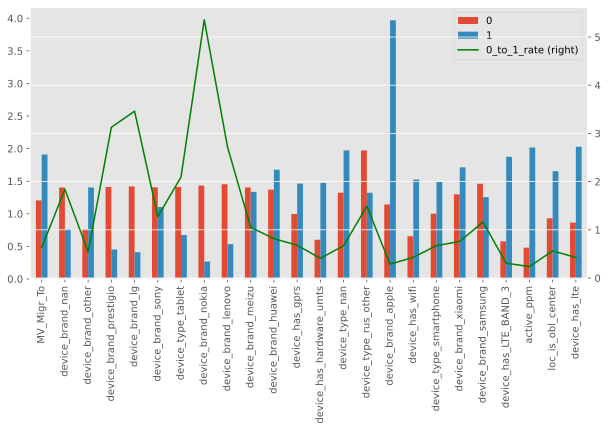

In [80]:
target_by_cat_cols_wo_modem_module = target_by_cat_cols[~target_by_cat_cols.index.isin(['device_type_module', 'device_type_modem', 'device_type_phone'])]

for col in target_by_cat_cols_wo_modem_module.index:
    temp = data_nulls_less_60p.pivot_table(columns=col,values='target', aggfunc='median').fillna(0).applymap(float)
#     print(temp.values[0][0])
    target_by_cat_cols_wo_modem_module.loc[col]['0'] = temp.values[0][0]
    target_by_cat_cols_wo_modem_module.loc[col]['1'] = temp.values[0][1]
    target_by_cat_cols_wo_modem_module.loc[col]['0_to_1_rate'] = temp.values[0][0]/temp.values[0][1]

width = .35
    
ax1 = target_by_cat_cols_wo_modem_module.loc[:, ['0', '1']].plot(kind = 'bar', figsize = (10,5), rot = 90);
ax2 = target_by_cat_cols_wo_modem_module['0_to_1_rate'].plot(secondary_y=True, colormap = 'ocean', rot = 90, legend = True);


In [81]:
num_cols = univalue_cols[univalue_cols['if_cat'] == 0]

num_cols['fr+nan'] = num_cols['%of_fr_univalue'] + num_cols['%nans']
print(num_cols.shape)

#starting a listy of columns, not useful for analysis
#adding columns with 100% of univalue + nan
cols_to_delete = num_cols[num_cols['fr+nan'] == 1]['col']

#filtering out columns with 100% of univalue + nan
num_cols = num_cols[num_cols['fr+nan'] != 1]

print(num_cols.shape)


num_cols = num_cols.sort_values(by = ['fr+nan'], ascending = False)
univalue_num_cols_style = num_cols.style.apply(highlight_p75, \
                                               subset=['%outliers', '%nans']).format({'%of_fr_univalue': "{:.2%}",\
                                                                                      '%of_unfr_univalue': "{:.2%}",\
                                                                                      '%outliers': "{:.2%}",\
                                                                                      '%nans': "{:.2%}", \
                                                                                      'fr+nan': "{:.4%}"})
univalue_num_cols_style

(753, 8)
(740, 8)


,col,%of_fr_univalue,%of_unfr_univalue,freq_value,if_cat,%outliers,%nans,fr+nan
132,MV_ot_Unkn,64.87%,0.00%,0.000000,0,0.00%,35.13%,99.9996%
688,all_roam_clc_min_mnt3,99.70%,0.00%,0.000000,0,0.00%,0.30%,99.9992%
754,voice_in_roam_clc_min_mnt1,99.70%,0.00%,0.000000,0,0.00%,0.30%,99.9992%
91,MV_ARPU_innet_inc_v_Traf,99.71%,0.00%,0.000000,0,0.00%,0.29%,99.9992%
72,MV_Traf_Cont_inc_v_Min,99.71%,0.00%,0.000000,0,0.00%,0.29%,99.9988%
437,pay_p2p_out_sum_max_mnt3,99.70%,0.00%,0.000000,0,0.00%,0.30%,99.9988%
744,sms_roam_clc_min_mnt1,99.69%,0.00%,0.000000,0,0.00%,0.30%,99.9980%
433,pay_p2p_out_sum_max_mnt1,99.69%,0.00%,0.000000,0,0.00%,0.30%,99.9960%
80,MV_Traf_Other_out_v_Min,99.70%,0.00%,0.000000,0,0.01%,0.29%,99.9940%
718,abon_part_min_mnt3,99.69%,0.00%,0.000000,0,0.01%,0.30%,99.9916%


In [82]:
cols_with_univ_nan_more_099_and_nan_more_025 = num_cols[(num_cols['fr+nan'] > 0.99)|(num_cols['%nans'] > 0.25)]


# for col in cols_with_univ_nan_more_than099['col']:
#     print(col);
#     a = data_nulls_less_60p[col].loc[~data_nulls_less_60p[col].isna()]
#     a = a.loc[a != 0]
#     print(a.values);
#     print();

In [83]:
print(cols_to_delete.shape)
cols_to_delete = cols_to_delete.append(cols_with_univ_nan_more_099_and_nan_more_025.col)
print(cols_to_delete.shape)

num_cols = num_cols[num_cols['fr+nan'] < 0.99]
print(num_cols.shape)

(13,)
(106,)
(677, 8)


In [84]:
num_cols_plus_target = num_cols.col.tolist()
num_cols_plus_target.append('target')
data_few_nans_not_univalue = data_nulls_less_60p.loc[: , data_nulls_less_60p.columns.isin(num_cols_plus_target)]

In [93]:
data_fewnan_not_univ_targ_corr_high = data_few_nans_not_univalue_target_corr[(data_few_nans_not_univalue_target_corr.target<-0.2)|\
                                                                             (data_few_nans_not_univalue_target_corr.target > 0.2)]

In [96]:
data_descr = pd.read_csv('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_descr.csv', \
                         names=['feature', 'descr'])
data_fewnan_not_univ_targ_corr_high_descr = pd.merge(data_fewnan_not_univ_targ_corr_high, data_descr, how='left', \
                                                    left_index=True, right_on='feature')

In [98]:
col = ['non_accum_internet_vol_std_mnt1', 'non_accum_internet_vol_mea_mnt3', 'non_accum_internet_vol_max_mnt3', 'non_accum_internet_vol_min_mnt3', 'non_accum_internet_vol_std_mnt3']

In [97]:
data_fewnan_not_univ_targ_corr_high_descr

,target,feature,descr
155.0,0.321195,MV_Traf_2G_d_Mb,трафик_от_2G_интернета_в_мегабайтах
157.0,0.309782,MV_Traf_3G_d_Mb,трафик_от_3G_интернета_в_мегабайтах
159.0,0.309918,MV_Traf_4G_d_Mb,трафик_от_4G_интернета_в_мегабайтах
161.0,0.204042,MV_ARPU,Общий_доход_(net_total+AP_total+ot_total)
204.0,0.283067,MV_ap_4G_d,абонплата_от_4G_интернета_в_гривнах
209.0,-0.260928,MV_ap_innet_out_v,абонплата_от_исходящих_звонков_внутри_сети_в_г...
215.0,0.268167,MV_AP_total,общая_сумма_снятия_абонплат
600.0,0.315414,non_accum_internet_vol_std_mnt1,Объем переданных данных вне пакета услуг - ста...
601.0,0.269702,non_accum_internet_vol_mea_mnt3,Объем переданных данных вне пакета услуг - ста...
602.0,0.432103,non_accum_internet_vol_max_mnt3,Объем переданных данных вне пакета услуг - ста...


In [ ]:
# num_cols_list = num_cols['col'].tolist()
# target_by_num_cols = pd.DataFrame(index=num_cols_list, columns=['0', '1', '0_to_1_rate'])

# for col in num_cols_list:
#     temp = data_nulls_less_60p.pivot_table(columns=col,values='target', aggfunc='median').fillna(0).applymap(float)
# #     print(temp.values[0][0])
#     target_by_num_cols.loc[col]['0'] = temp.values[0][0]
#     target_by_num_cols.loc[col]['1'] = temp.values[0][1]
#     target_by_num_cols.loc[col]['0_to_1_rate'] = temp.values[0][0]/temp.values[0][1]

# width = .35
    
# ax1 = target_by_num_cols.loc[:, ['0', '1']].plot(kind = 'bar', figsize = (10,5), rot = 90);
# ax2 = target_by_num_cols['0_to_1_rate'].plot(secondary_y=True, colormap = 'ocean', rot = 90, legend = True);
# ax2.set_ylim(0, 150);

In [ ]:
rows_lots_nas = data_nulls_less_60p.loc[: , data_nulls_less_60p.columns.isin(num_cols_lots_nans.col)].dropna(how = 'all').index
data_nulls_less_60p.loc[~data_nulls_less_60p.index.isin(rows_lots_nas)]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_nulls_less_60p)
data_nulls_less_60p_normalized = pd.DataFrame(x_scaled)
data_nulls_less_60p_normalized.columns = data_nulls_less_60p.columns
data_nulls_less_60p_normalized.head()

In [ ]:
# #traff data turn to negatives in comarison with where target is not zero

# describe_data = describe_data[columns_nulls_less_60p]
# describe_data_nulls_less_60p_target0 = data_nulls_less_60p[data_nulls_less_60p['target']== 0].describe()
# describe_data_nulls_less_60p_target0.sub(describe_data)


# stats_comp = describe_data_nulls_less_60p_target0.iloc[[1,5], :].sub(describe_data.iloc[[1,5], :]). \
#     divide(describe_data_nulls_less_60p_target0.iloc[[1,5], :]).transpose()
# stats_comp.head()

# stats_comp.sort_values(by = '50%').style.format({'mean' : '{:,.2f}', '50%' : '{:,.2f}'})

# p25 = data_nulls_less_60p['non_accum_internet_vol_max_mnt1'].describe()['25%']
# p75 = data_nulls_less_60p['non_accum_internet_vol_max_mnt1'].describe()['75%']
# p50 = data_nulls_less_60p['non_accum_internet_vol_max_mnt1'].describe()['50%']
# pmax = data_nulls_less_60p['non_accum_internet_vol_max_mnt1'].describe()['max']
# #data_nulls_less_60p['non_accum_internet_vol_max_mnt1'].describe()
# #data_nulls_less_60p[data_nulls_less_60p['non_accum_internet_vol_max_mnt1'] == 0].shape

# #data_nulls_less_60p['non_accum_internet_vol_max_mnt1'].sort_values(ascending = False).head()
# (data_nulls_less_60p['non_accum_internet_vol_max_mnt1'] != 0).sum()


In [ ]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Target')
sns.boxplot(ax = axes[0], data = data_nulls_less_60p, x = 'target', orient = 'v' )
sns.distplot(ax = axes[1], a = data_nulls_less_60p['target'])


print(data_nulls_less_60p['target'].describe())

In [ ]:
# p75_target  = data_nulls_less_60p['target'].describe()['75%']
# #data_nulls_less_60p[data_nulls_less_60p['target'] < p75_target]['target'].hist()
# data_nulls_less_60p.sort_values(by = 'target', ascending = False)['target'].head(1000)

In [ ]:
sns.distplot?

In [ ]:
cols = ['target', 'traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
hm = sns.heatmap(data[cols].corr(), cbar=True, annot=True)

In [99]:
cols_traff_only = ['traff_m5', 'traff_m3', 'traff_m2', 'traff_m1']
cols = data_fewnan_not_univ_targ_corr_high_descr['feature']
data = data_nulls_less_60p[cols].fillna(0).astype('float32')

X, y = data[col], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 17)

In [100]:
# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

MemoryError: 

Feature 0: 70856.056414
Feature 1: 94678.545834
Feature 2: 119794.982230
Feature 3: 144000.368815


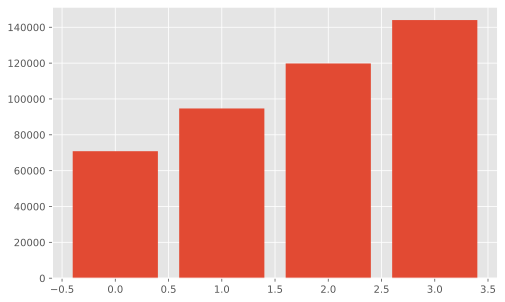

In [73]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
#class sklearn.feature_selection.VarianceThreshold(threshold=0.0)
#SPEARMAN Correlation

In [ ]:
# X, y = data.loc[:, data.columns != 'target'], data.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 17)

In [ ]:
data.dtypes

In [ ]:
slr = LinearRegression()

slr.fit(X_train, y_train)

print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [ ]:
# cols_traff_only = ['traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
# RMSE train: 8.506347, test: 8.698570
# R^2 train: 0.484724, test: 0.468375


print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_train, y_train_pred, squared = False),
        mean_squared_error(y_test, y_test_pred, squared = False)))
print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

In [ ]:
cols_traff_only = ['traff_m5', 'traff_m3', 'traff_m2', 'traff_m1']
X, y = data_nulls_less_60p[cols_traff_only], data_nulls_less_60p.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 17)

slr = LinearRegression()

slr.fit(X_train, y_train)

print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_train, y_train_pred, squared = False),
        mean_squared_error(y_test, y_test_pred, squared = False)))
print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.values.reshape(-1, 1)).flatten()
# newaxis увеличивает размерность массива, flatten — наооборот
# https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#numpy.newaxis
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.flatten.html

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_std, y_std, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)
print(lasso.coef_)

print('RMSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_scaled, y_train_pred, squared = False),
        mean_squared_error(y_test_scaled, y_test_pred, squared = False)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_scaled, y_train_pred),
        r2_score(y_test_scaled, y_test_pred)))

In [ ]:
data['target'].describe()

In [ ]:
# model = ltb.LGBMRegressor()
# model.fit(X_train, y_train)
# print(); print(model)

# expected_y  = y_test
# predicted_y = model.predict(X_test)


In [ ]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_error(expected_y, predicted_y))

In [ ]:
#closs_val_score(model, X, y ... )
#from skearn.model_selection import GridSearchCV